In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
u0 = 100 # initial conditions for u and v. Try: setting u0 = v0, setting them far apart
v0 = 99

a1 = 100 # a1 and a2 are the alphas: synthesis rates for u and v, respectively
a2 = 100
beta = 3 # beta & gamma are cooperativity values. Try: no cooperativity (beta = gamma = 1, asymmetric cooperativity) 
gamma = 3

T = 50.0  # total time
dt = .1  # time step
n = int(T / dt)  # number of iterations

u = [None]*n # arrays to store u(t), v(t)
v = [None]*n

u[0] = u0 # start with the initial conditions
v[0] = v0

In [8]:
for i in range (n-1):
    last_u = u[i] # what was the last point
    last_v = v[i]
    u[i+1] = last_u + ((a1 / (1 + last_v**beta)) - last_u) * dt # update with the last point plus dt * the new value
    v[i+1] = last_v + ((a2 / (1 + last_u**gamma)) - last_v) * dt

Text(0, 0.5, 'Abundance')

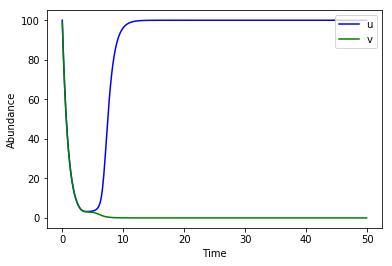

In [9]:
plt.plot(range(n), u, color='blue', label='u') # plot
plt.plot(range(n), v, color='green', label='v')
tic = n/5.
lab = int(tic * dt)
plt.xticks([0, tic, tic*2, tic*3, tic*4, tic*5], [0, lab, lab*2, lab*3, lab*4, lab*5])
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Abundance')

In [11]:
u[int(n * 0.95)] # check the value at the end of the simulation

99.99999999989993

In [12]:
v[int(n * 0.95)]

9.999990000040042e-05

Text(0, 0.5, 'Abundance')

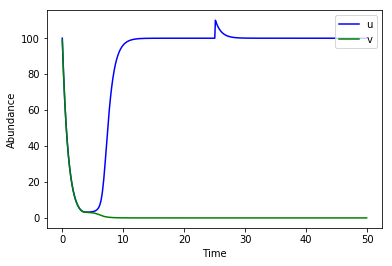

In [14]:
# repeat the above but with a fluctuation at T/2 to test for stability
fluctuation_fraction = 0.1 # higher values are stronger fluctuations

for i in range (n-1):
    last_u = u[i] # what was the last point
    last_v = v[i]
    u[i+1] = last_u + ((a1 / (1 + last_v**beta)) - last_u) * dt # update with the last point plus dt * the new value
    v[i+1] = last_v + ((a2 / (1 + last_u**gamma)) - last_v) * dt
    
    if i == n/2: # inject noise
        u[i+1] += u[i+1]*fluctuation_fraction
        v[i+1] -= v[i+1]*fluctuation_fraction
    
plt.plot(range(n), u, color='blue', label='u') # plot
plt.plot(range(n), v, color='green', label='v')
tic = n/5.
lab = int(tic * dt)
plt.xticks([0, tic, tic*2, tic*3, tic*4, tic*5], [0, lab, lab*2, lab*3, lab*4, lab*5])
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Abundance')